In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Set previous variables 
t_max = 150e-3   # second       # total amount of x points or potential 
dt = 1e-3        # second       # 
tau = 20e-3      # second       # Membrane Time Constant
el = -60e-3      # milivolt     # Leak Potential 
vr = -70e-3      # milivolt     # Reset Voltage
vth = -50e-3     # milivolt     # Firing Threshold
r = 100e6        # ohm          # Membrane Resisitance
i_mean = 25e-11  # ampere       # Mean Current Input


In [11]:
def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
  """
  Plots Time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args:
    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neurons, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  """

  v_mean = np.mean(v, axis=0)
  fig_w, fig_h = plt.rcParams['figure.figsize']
  plt.figure(figsize=(fig_w, 1.5 * fig_h))

  ax1 = plt.subplot(3, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v[j], color="k", marker=".", alpha=0.01)
  plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
  plt.xticks([])
  plt.ylabel(r'$V_m$ (V)')

  if raster is not None:
    plt.subplot(3, 1, 2)
    spikes_mean = np.mean(raster, axis=0)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')

  else:
    plt.subplot(3, 1, 2, sharex=ax1)
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

  plt.xticks([])
  plt.ylabel('neuron')

  if spikes_mean is not None:
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

  plt.tight_layout()
  plt.show()

## Coding Exercise 1: Plotting a histogram
Plot an histogram of $J=50$ bins of $N=10000$ realizations of $V(t)$ for $t=t_{max}/10$ and $t=t_{max}$.

We'll make a small correction in the definition of `t_range` to ensure increments of `dt` by using `np.arange` instead of `np.linspace`.

    numpy.arange(start, stop, step)

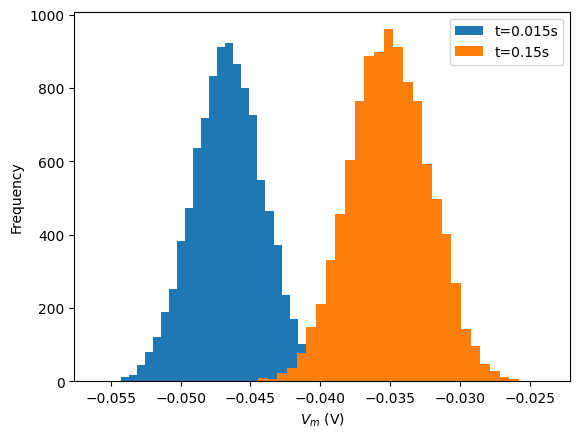

In [49]:

# Set random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i and nbins
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 32

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] =  v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Initialize the figure
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')

  # Plot a histogram at t_max/10 (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:,int(step_end / 10)], nbins,
            histtype='stepfilled', linewidth=0,
            label = 't='+ str(t_max / 10) + 's')

  # Plot a histogram at t_max (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, -1], nbins,
            histtype='stepfilled', linewidth=0,
            label = 't='+ str(t_max) + 's')
  # Add legend
plt.legend()

plt.show()

## Coding Exercise 2: Adding spiking to the LIF neuron

Insert the reset condition, and collect the spike times of each realization in a dictionary variable `spikes`, with $N=500$.

We've used `plt.plot` for plotting lines and also for plotting dots at `(x,y)` coordinates, which is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). From here on, we'll use use `plt.plot` for plotting lines and for scatter plots: `plt.scatter`.

```python
plt.scatter(x, y, color="k", marker=".")
```

<AxesSubplot: >

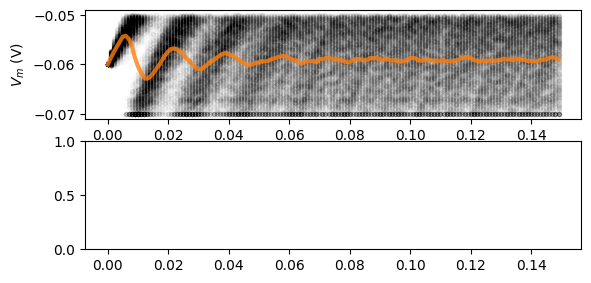

In [75]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n =np.zeros(step_end)

# Loop over time steps
for step, t in enumerate(t_range):

    # Skip first iteration
    if step==0:
        continue

    # Compute v_n
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

    # Loop over simulations
    for j in range(n):
        
        # Check if voltage above treshold
        if v_n[j, step] >= vth:

            # Reset to reset voltage
            v_n[j,step] = vr

            # Add this spike time
            spikes[j] += v_n[j,step]

            # Add spike count to this step
            spikes_n[step] += 1

#Collect mean Vm and mean spike rate
v_mean = np.mean(v_n, axis =0)
spikes_mean = spikes_n / n

# Initialize the figure
plt.figure()

# Plot simulations and sample mean 
ax1 = plt.subplot(3,1,1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8,linewidth=3)
plt.ylabel('$V_m$ (V)')

# Plot spikes
plt.subplot(3,1,2, sharex=ax1)
# For each neuron j: collect spike times and plot them at height j
for j in range(n):
    times =0
    plt.scatter()


### Coding Exercise 3: Using Boolean Indexing